<a href="https://www.kaggle.com/code/rahulbanerj24/cnn-with-image-classification?scriptVersionId=181492596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
import cv2
import pandas as pd
import io

In [3]:
A=cv2.imread('/kaggle/input/image-samples/Example_3.jpg')

In [4]:
A.shape

(28, 28, 3)

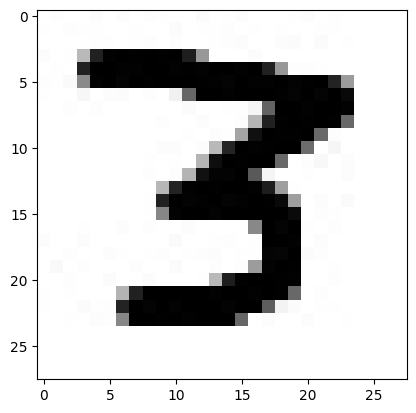

In [5]:
import matplotlib.pyplot as plt
plt.imshow(A)

In [6]:
#Data Collection
from keras.datasets import mnist


2024-06-04 15:43:38.908939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 15:43:38.909101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 15:43:39.089850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#X train has an image as a matrix and y_train has a number
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train[25]

2

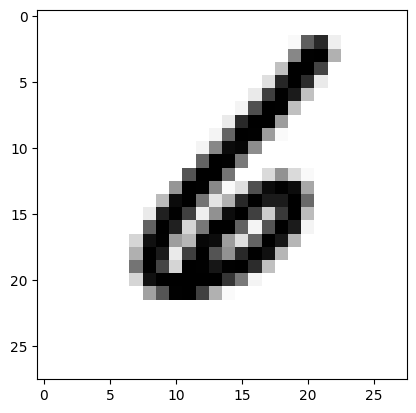

In [10]:
#Image Visualisation
plt.imshow(x_train[999],plt.get_cmap('binary'))

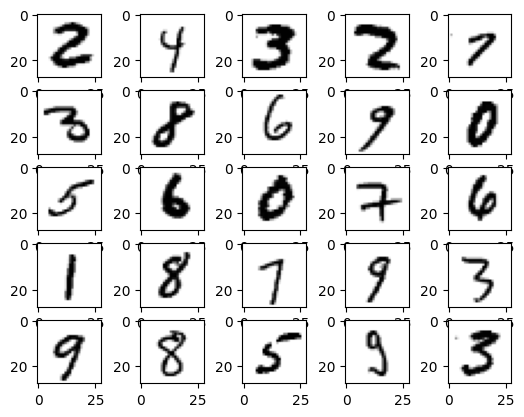

In [11]:
x=1
for i in range(25,50):
    plt.subplot(5,5,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [12]:
#Start Processing

In [13]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [14]:
#Encoding
from keras.utils import to_categorical
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [15]:
#Build Model
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Convolution2D,MaxPooling2D,Flatten

In [16]:
nn=Sequential()

In [17]:
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Flatten())

nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000))

nn.add(Dense(10,activation='softmax'))

In [18]:
#Compile
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
#Add Callbacks
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=5)

In [20]:
#Fit the model
hist=nn.fit(x_train,y_train1,validation_split=0.2,callbacks=[Early],epochs=5)

Epoch 1/5
1500/1500 [==============================] - 57s 36ms/step - loss: 0.6402 - accuracy: 0.7922 - val_loss: 0.1887 - val_accuracy: 0.9427
Epoch 2/5
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3779 - accuracy: 0.8852 - val_loss: 0.1994 - val_accuracy: 0.9401
Epoch 3/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.3108 - accuracy: 0.9035 - val_loss: 0.1210 - val_accuracy: 0.9643
Epoch 4/5
1500/1500 [==============================] - 56s 37ms/step - loss: 0.2880 - accuracy: 0.9119 - val_loss: 0.1244 - val_accuracy: 0.9597
Epoch 5/5
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2614 - accuracy: 0.9185 - val_loss: 0.1253 - val_accuracy: 0.9623


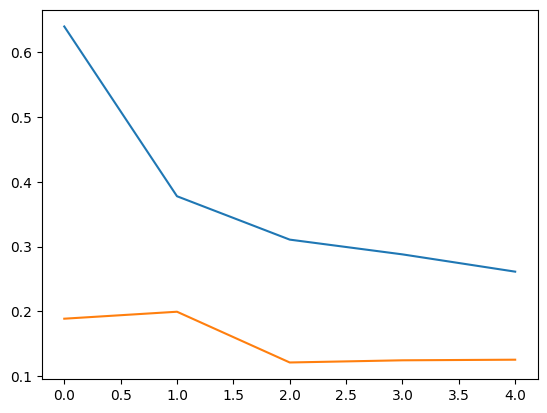

In [21]:
#Visulaise the result
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [22]:
# Evaluation Of Training data
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
import numpy as np

In [23]:
y_pred_train=nn.predict(x_train)
y_pred_train[0]

1875/1875 [==============================] - 19s 10ms/step


array([0.00101693, 0.00126764, 0.00198412, 0.29171365, 0.00058783,
       0.5427712 , 0.00276365, 0.00172455, 0.13736631, 0.0188041 ],
      dtype=float32)

In [24]:
y_pred_train1=np.argmax(y_pred_train,axis=-1)
y_pred_train1

array([5, 0, 4, ..., 5, 6, 8])

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=multilabel_confusion_matrix(y_pred_train1,y_train)

print('Accuracy:',acc)
print('Confusion matrix:\n',cnf)
print('classification Report:\n',clf)

Accuracy: 0.9633
Confusion matrix:
 [[[53968   256]
  [  109  5667]]

 [[53115    73]
  [  143  6669]]

 [[53765   281]
  [  277  5677]]

 [[53684   196]
  [  185  5935]]

 [[53919   172]
  [  239  5670]]

 [[54518   245]
  [   61  5176]]

 [[53514    18]
  [  568  5900]]

 [[53610   428]
  [  125  5837]]

 [[53918   248]
  [  231  5603]]

 [[53787   285]
  [  264  5664]]]
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5776
           1       0.99      0.98      0.98      6812
           2       0.95      0.95      0.95      5954
           3       0.97      0.97      0.97      6120
           4       0.97      0.96      0.97      5909
           5       0.95      0.99      0.97      5237
           6       1.00      0.91      0.95      6468
           7       0.93      0.98      0.95      5962
           8       0.96      0.96      0.96      5834
           9       0.95      0.96      0.95      5928

    

In [27]:
#Testing Data Analysis

In [28]:
ts_pred=nn.predict(x_test)
ts_pred

313/313 [==============================] - 4s 11ms/step


array([[6.0970691e-05, 1.0313261e-04, 8.0760528e-04, ..., 9.9610317e-01,
        6.4245905e-06, 4.1653249e-05],
       [2.8229562e-05, 4.4052402e-05, 9.9940097e-01, ..., 3.5503897e-05,
        5.9714013e-05, 1.1295454e-06],
       [1.7912100e-09, 9.9999493e-01, 2.1805844e-08, ..., 1.9165714e-08,
        4.6631354e-07, 3.7562059e-10],
       ...,
       [1.9663485e-08, 3.1419268e-07, 6.7942260e-08, ..., 1.1350442e-07,
        1.6743389e-06, 2.6277257e-05],
       [7.9046249e-06, 4.9525875e-06, 4.4630113e-07, ..., 9.5635983e-07,
        2.5403055e-03, 3.5010825e-04],
       [2.4349560e-05, 2.5143650e-06, 1.1889622e-06, ..., 4.6591136e-08,
        2.7463162e-05, 1.3969787e-06]], dtype=float32)

In [29]:
y_pred=np.argmax(ts_pred,axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
#Testing Accuracy
acc1=accuracy_score(y_pred,y_test)
clf1=classification_report(y_pred,y_test)
cnf1=multilabel_confusion_matrix(y_pred,y_test)

print('Accuracy:',acc1)
print('Confusion matrix:\n',cnf1)
print('classification Report:\n',clf1)

Accuracy: 0.9641
Confusion matrix:
 [[[8993   45]
  [  27  935]]

 [[8847   11]
  [  18 1124]]

 [[8919   46]
  [  49  986]]

 [[8961   29]
  [  29  981]]

 [[8983   15]
  [  35  967]]

 [[9092   42]
  [  16  850]]

 [[8952   11]
  [  90  947]]

 [[8944   82]
  [  28  946]]

 [[8991   34]
  [  35  940]]

 [[8959   44]
  [  32  965]]]
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       962
           1       0.99      0.98      0.99      1142
           2       0.96      0.95      0.95      1035
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97      1002
           5       0.95      0.98      0.97       866
           6       0.99      0.91      0.95      1037
           7       0.92      0.97      0.95       974
           8       0.97      0.96      0.96       975
           9       0.96      0.97      0.96       997

    accuracy                           0.96 

In [32]:
#Unseen Data Prediction

In [33]:
img=cv2.imread('/kaggle/input/image-samples/Example_3.jpg',cv2.IMREAD_GRAYSCALE)

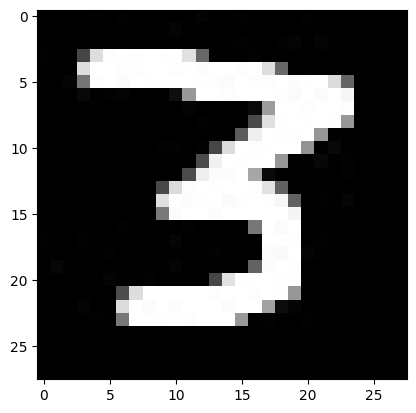

In [34]:
plt.imshow(img,plt.get_cmap('binary'))

In [35]:
img1=~img

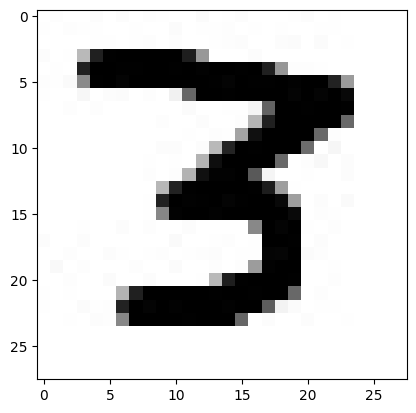

In [36]:
plt.imshow(img1,plt.get_cmap('binary'))

In [37]:
img1=img1/255


In [38]:
ar1=np.array([img1])
ar1

array([[[0.        , 0.00784314, 0.        , 0.        , 0.01176471,
         0.        , 0.01176471, 0.        , 0.00784314, 0.00392157,
         0.        , 0.        , 0.01568627, 0.        , 0.00392157,
         0.01176471, 0.        , 0.        , 0.        , 0.00392157,
         0.01176471, 0.        , 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.00784314, 0.00392157, 0.00392157,
         0.        , 0.        , 0.00392157, 0.        , 0.        ,
         0.01568627, 0.        , 0.00392157, 0.00392157, 0.00784314,
         0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
         0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.00392157, 0.        , 0.00392157, 0.00784314, 0.        ,
         0.00784314, 0.        , 0.        , 0.00392157, 0.00784314,
         0.

In [39]:
x=nn.predict(ar1)

1/1 [==============================] - 0s 27ms/step


In [40]:
np.argmax(x)

3